In [1]:
import pandas as pd
import numpy as np
import arff
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
df_unitial =  pd.read_csv('ObesityDataSet.csv')
df_unitial.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df_unitial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [71]:
df = df_unitial.copy()

In [72]:
# Renaming columns
rename_columns = {
    "FAVC": "frequent_high_calorie_food",
    "FCVC": "vegetables_with_meals",
    "NCP": "daily_main_meals",
    "CAEC": "snacks_between_meals",
    "SMOKE": "smokes",
    "CH2O": "daily_water_intake",
    "SCC": "calorie_intake_monitoring",
    "FAF": "physical_activity_freq",
    "TUE": "daily_tech_device_usage",
    "CALC": "alcohol_consumption_freq",
    "MTRANS": "transportation_mode",
    "NObeyesdad": "obesity_level"
}

df = df.rename(columns=rename_columns)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_high_calorie_food,vegetables_with_meals,daily_main_meals,snacks_between_meals,smokes,daily_water_intake,calorie_intake_monitoring,physical_activity_freq,daily_tech_device_usage,alcohol_consumption_freq,transportation_mode,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<Figure size 1200x600 with 0 Axes>

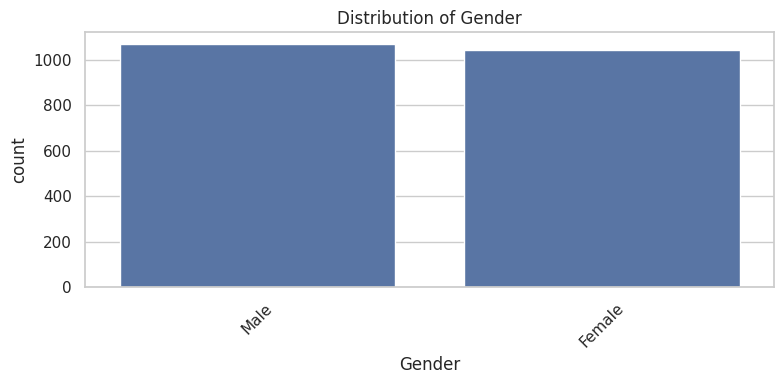

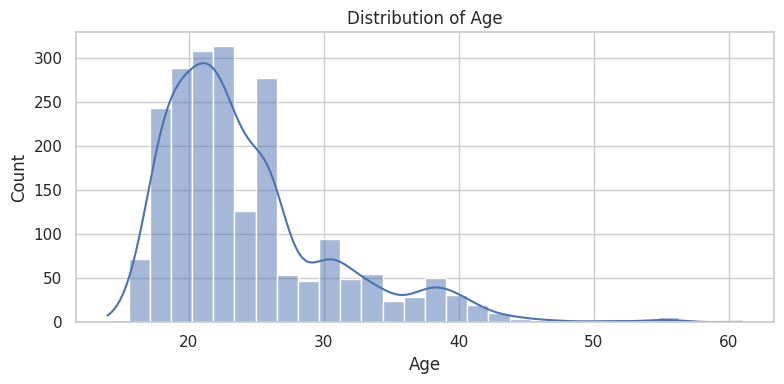

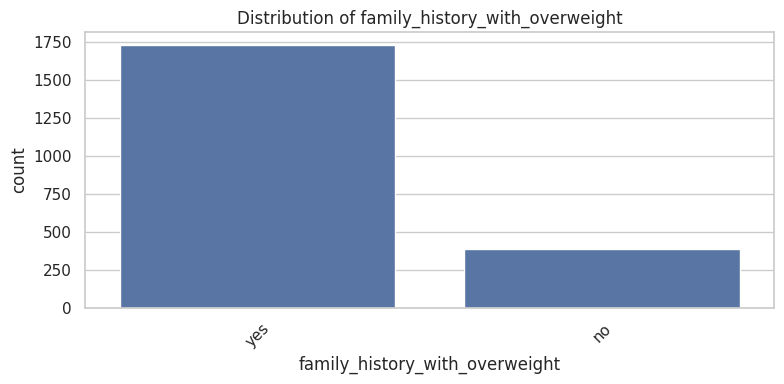

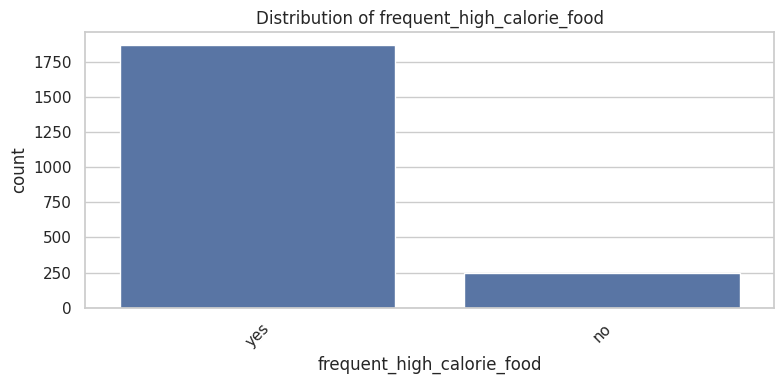

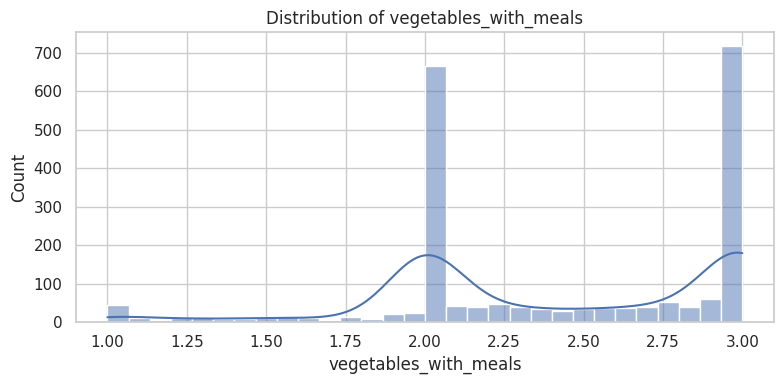

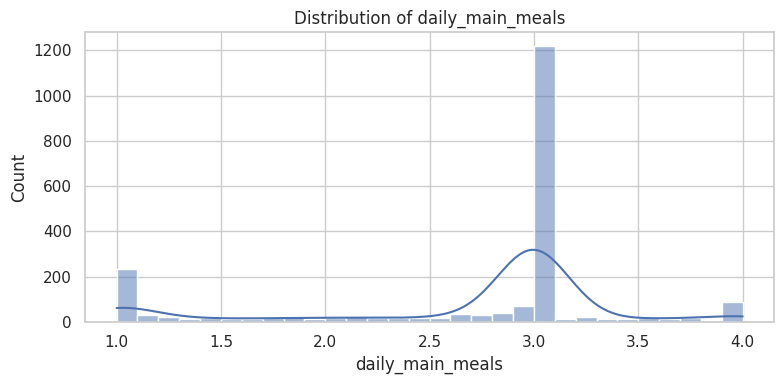

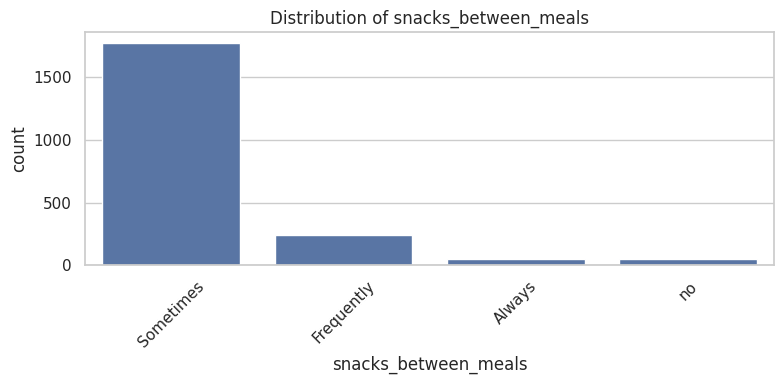

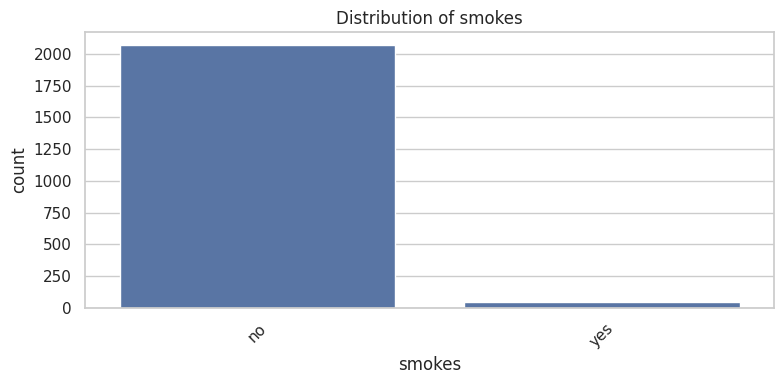

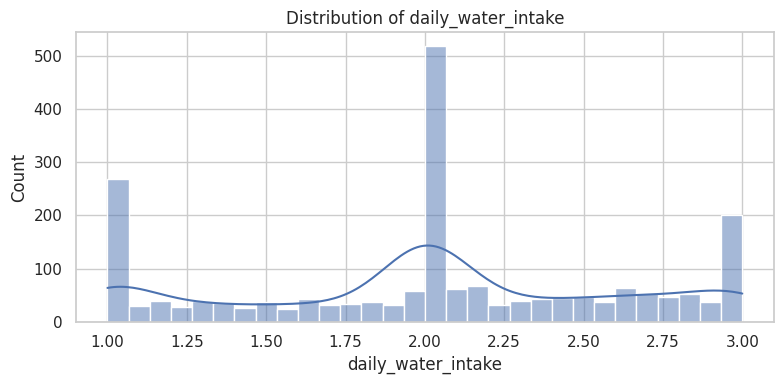

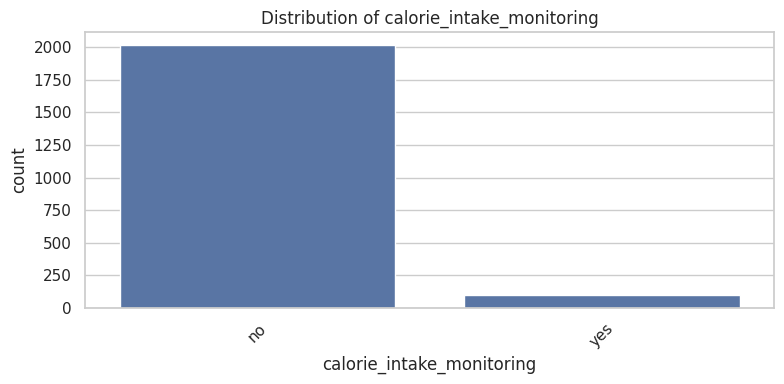

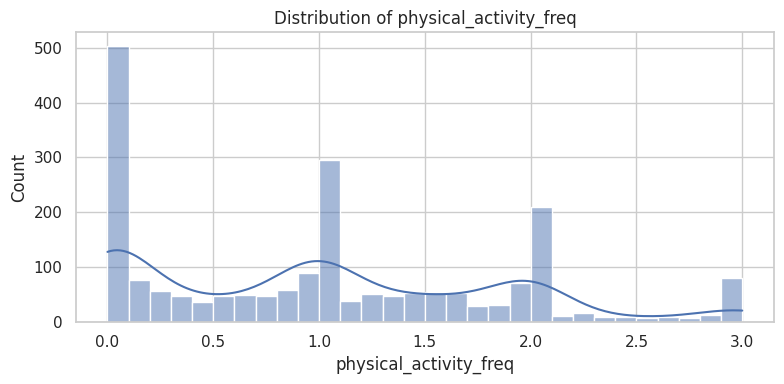

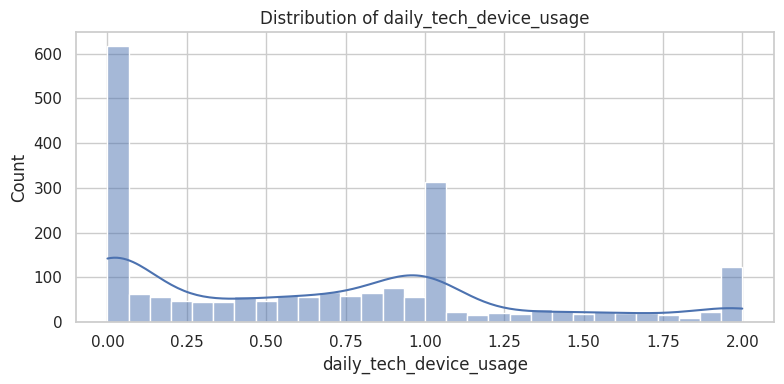

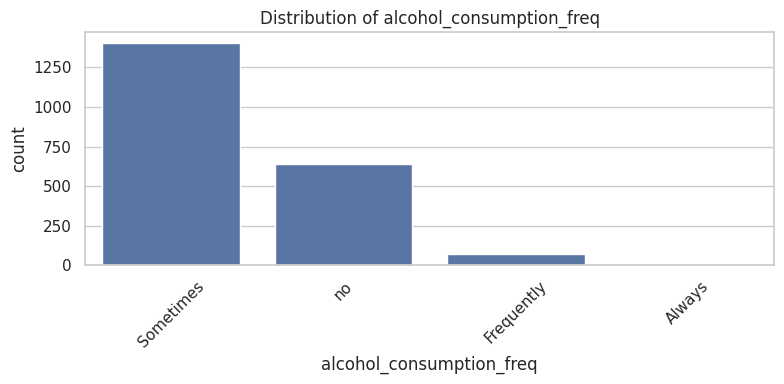

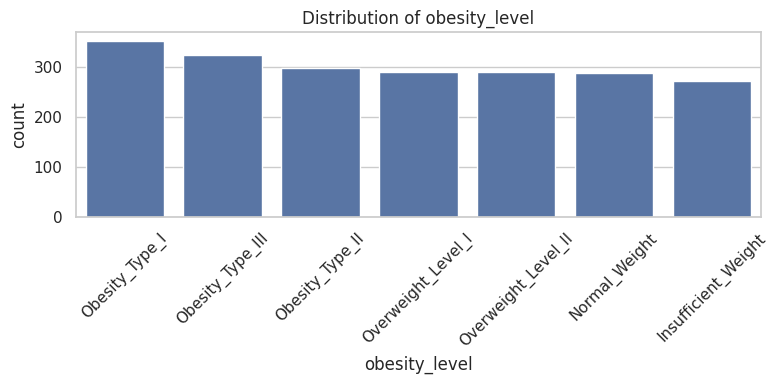

In [73]:
# features and target distribution

cat_columns = ["Gender", "family_history_with_overweight", "frequent_high_calorie_food", "snacks_between_meals", "smokes", "calorie_intake_monitoring", "alcohol_consumption_freq", "transportation_mode", "obesity_level"]

for col in cat_columns:
    df[col] = df[col].astype('category')

    
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

columns = ['Gender', 'Age', 'family_history_with_overweight', 'frequent_high_calorie_food', 'vegetables_with_meals', 'daily_main_meals',
           'snacks_between_meals', 'smokes', 'daily_water_intake', 'calorie_intake_monitoring', 'physical_activity_freq', 'daily_tech_device_usage',
           'alcohol_consumption_freq', 'obesity_level']

for col in columns:
    plt.figure(figsize=(8, 4))
    
    if df[col].dtype == 'category' or df[col].nunique() < 15:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    else:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()


In [74]:
# Creting new target column 'obesity_level_grouped' based on the 'obesity_level' meanings:
# - 'Normal_Weight' --> 'Normal_Weight'
# - 'Insufficient_Weight' --> 'Insufficient_Weight'
# - 'Overweight_Level_I', 'Overweight_Level_II' --> 'Overweight'
# - 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' --> 'Obesity'
conditions = [
    df['obesity_level'] == 'Normal_Weight',
    df['obesity_level'] == 'Insufficient_Weight',
    df['obesity_level'].isin(['Overweight_Level_I', 'Overweight_Level_II']),
    df['obesity_level'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
]
choices = ['Normal_Weight', 'Insufficient_Weight', 'Overweight', 'Obesity']

df['obesity_level_grouped'] = np.select(conditions, choices, default='Unknown')
df.drop(columns=['obesity_level'], inplace=True)


In [75]:
# Deleting columns 'Height' and 'Weight' since they directly predict the target value
df.drop(columns=['Height', 'Weight'], inplace=True)

Ordinal features:

- vegetables_with_meals (already in numeric form, needs Z-score standardisation / Min-Max scaling)
- snacks_between_meals (needs numeric mapping, then needs Z-score standardisation / Min-Max scaling)
- daily_water_intake (already in numeric form, needs Z-score standardisation / Min-Max scaling)
- physical_activity_freq (already in numeric form, needs Z-score standardisation / Min-Max scaling)
- daily_tech_device_usage (already in numeric form, needs Z-score standardisation / Min-Max scaling)
- alcohol_consumption_freq (needs numeric mapping, then needs Z-score standardisation / Min-Max scaling)

Categorincal features:

- Gender (needs OHE)
- family_history_with_overweight (needs label encoding)
- frequent_high_calorie_food (needs label encoding)
- smokes (needs label encoding)
- calorie_intake_monitoring (needs label encoding)
- transportation_mode (needs OHE)

Numerical (ratio) features:

- Age (needs Z-score standardisation / Min-Max scaling)
- daily_main_meals (needs Z-score standardisation / Min-Max scaling)

In [76]:
print(df['snacks_between_meals'].unique())
print()
print(df['alcohol_consumption_freq'].unique())

['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']

['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']


In [77]:
# numerical mapping for 'snacks_between_meals', 'alcohol_consumption_freq'
mapping = {
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
    }
df['snacks_between_meals'] = df['snacks_between_meals'].map(mapping)
df['alcohol_consumption_freq'] = df['alcohol_consumption_freq'].map(mapping)


In [78]:
# function for label encoding for 'family_history_with_overweight','frequent_high_calorie_food', 'smokes', 'calorie_intake_monitoring': 1 if 'Yes', 0 if 'No'
def label_encoding(df):
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
    df['frequent_high_calorie_food'] = df['frequent_high_calorie_food'].map({'yes': 1, 'no': 0})
    df['smokes'] = df['smokes'].map({'yes': 1, 'no': 0})
    df['calorie_intake_monitoring'] = df['calorie_intake_monitoring'].map({'yes': 1, 'no': 0})
    return df


In [79]:
# function for one hot encoding 
columns_for_ohe = ['Gender', 'transportation_mode']

def one_hot_encoding(df, columns_for_ohe):
    return pd.get_dummies(df, columns=columns_for_ohe, drop_first=True).replace({True: 1, False: 0})


In [80]:
# function that applies Min-Max scaling for columns in columns_for_standardisation
columns_for_standardisation = [
    'vegetables_with_meals', 'snacks_between_meals', 'daily_water_intake',
    'physical_activity_freq', 'daily_tech_device_usage', 
    'alcohol_consumption_freq', 'Age', 'daily_main_meals'
]

df[columns_for_standardisation] = df[columns_for_standardisation].astype(float)

def min_max_scaling(df, columns_for_standardisation):
    df_work = df.copy()
    for column in columns_for_standardisation:
        min_val = df_work[column].min()
        max_val = df_work[column].max()
        df_work[column] = (df_work[column] - min_val) / (max_val - min_val)
    return df_work

In [81]:
# function that applies - Z-score standardisation for columns in columns_for_standardisation
def z_score_standardization(df, columns_for_standardisation):
    df_work = df.copy()
    for column in columns_for_standardisation:
        mean = df_work[column].mean()
        std_dev = df_work[column].std()
        df_work[column] = (df_work[column] - mean) / std_dev
    return df_work

In [82]:
# Apply preprocessing for categorical values

df_encoded_pre = label_encoding(df)
df_encoded_pre = one_hot_encoding(df_encoded_pre, columns_for_ohe)

df_encoded_pre.head()

Unable to process data. Unexpected type category


,Age,family_history_with_overweight,frequent_high_calorie_food,vegetables_with_meals,daily_main_meals,snacks_between_meals,smokes,daily_water_intake,calorie_intake_monitoring,physical_activity_freq,daily_tech_device_usage,alcohol_consumption_freq,obesity_level_grouped,Gender_Male,transportation_mode_Bike,transportation_mode_Motorbike,transportation_mode_Public_Transportation,transportation_mode_Walking
0,21.0,1,0,2.0,3.0,2.0,0,2.0,0,0.0,1.0,1.0,Normal_Weight,0,0,0,1,0
1,21.0,1,0,3.0,3.0,2.0,1,3.0,1,3.0,0.0,2.0,Normal_Weight,0,0,0,1,0
2,23.0,1,0,2.0,3.0,2.0,0,2.0,0,2.0,1.0,3.0,Normal_Weight,1,0,0,1,0
3,27.0,0,0,3.0,3.0,2.0,0,2.0,0,2.0,0.0,3.0,Overweight,1,0,0,0,1
4,22.0,0,0,2.0,1.0,2.0,0,2.0,0,0.0,0.0,2.0,Overweight,1,0,0,1,0


In [83]:
# split dataframe df_encoded_pre randomly into 2 dataframes: leave 80% of rows for training and 20% of rows for testing
df_train_pre, df_test_pre = train_test_split(df_encoded_pre, test_size=0.2, random_state=42)

In [84]:
# Create final preprocessed datasets: 2 versions (with min-max scaling and z_score standardisation) for train and test
df_train_minmax = min_max_scaling(df_train_pre, columns_for_standardisation)
df_test_minmax = min_max_scaling(df_test_pre, columns_for_standardisation)

df_train_zscale = z_score_standardization(df_train_pre, columns_for_standardisation)
df_test_zscale = z_score_standardization(df_test_pre, columns_for_standardisation)

In [87]:
df_train_minmax.to_csv('obesity_df_train_minmax_preprocessed.csv', index=False)
df_test_minmax.to_csv('obesity_df_test_minmax_preprocessed.csv', index=False)
df_train_zscale.to_csv('obesity_df_train_zscale_preprocessed.csv', index=False)
df_test_zscale.to_csv('obesity_df_test_zscale_preprocessed.csv', index=False)